In [3]:
import networkx as nx
import random
import ba_utils.visualization as visualization
import ba_utils.orderings as orderings
import ba_utils.network_rugs as nrugs
import ba_utils.data_generator as dg

def generate_dynamic_graphs(
    num_nodes=30,
    num_steps=10,
    num_groups=1,
    change_rate=0,
    intra_community_strength=1.0,
    inter_community_strength=0.1,
    seed=42
):
    """
    Generate dynamic graphs with evolving group structures and guaranteed connectedness.

    Parameters:
        num_nodes (int): Total number of nodes.
        num_steps (int): Number of time steps (snapshots).
        num_groups (int): Number of initial communities.
        change_rate (float): Fraction of nodes changing group per step.
        intra_community_strength (float): Probability of edge within a community (0 to 1).
        inter_community_strength (float): Probability of edge between communities (0 to 1).
        seed (int): Random seed for reproducibility.

    Returns:
        graphs (dict): timestep → nx.Graph
        ground_truth (dict): timestep → {node: group}
        change_log (dict): timestep → list of changed node IDs
    """
    random.seed(seed)
    nodes = list(range(num_nodes))
    community_assignment = {node: node % num_groups for node in nodes}

    graphs = {}
    ground_truth = {}
    change_log = {}

    for t in range(num_steps):
        G = nx.Graph()
        G.add_nodes_from(nodes)

        # Add intra- and inter-community edges
        for i in range(num_nodes):
            for j in range(i+1, num_nodes):
                same_group = community_assignment[i] == community_assignment[j]
                p = intra_community_strength if same_group else inter_community_strength
                if random.random() < p:
                    G.add_edge(i, j, weight=1.0 if same_group else 0.3)

        # Force minimal connectivity between communities
        community_nodes = {g: [] for g in range(num_groups)}
        for node, group in community_assignment.items():
            community_nodes[group].append(node)

        sorted_communities = sorted(community_nodes.keys())
        for i in range(len(sorted_communities) - 1):
            node_a = random.choice(community_nodes[sorted_communities[i]])
            node_b = random.choice(community_nodes[sorted_communities[i + 1]])
            G.add_edge(node_a, node_b, weight=0.01)  # Very weak connecting edge

        # Store current graph and group structure
        graphs[t] = G
        ground_truth[t] = community_assignment.copy()

        # Track community changes (from previous timestep)
        if t > 0:
            prev_assignment = ground_truth[t-1]
            changed_nodes = [
                node for node in nodes
                if community_assignment[node] != prev_assignment[node]
            ]
            change_log[t] = changed_nodes

        # Evolve group membership
        num_changes = int(change_rate * num_nodes)
        for _ in range(num_changes):
            node = random.choice(nodes)
            current_group = community_assignment[node]
            new_group = random.choice([g for g in range(num_groups) if g != current_group])
            community_assignment[node] = new_group

    return graphs, ground_truth, change_log

In [ ]:
simple, gt, cl = generate_dynamic_graphs(num_nodes=25, num_steps=50, num_groups=2)
nrugs.draw_networkrug(simple, color_encoding="id3", pixel_size=12),
visualization.visualize_graphs(simple)

fig = visualization.draw_all_colored(simple, title="Generated Graphs2", save=False, color_encoding="closeness_centrality", labels=True)
print(gt)

#if change_rate > 0:
#    print("Change log:")
#for t in cl:
#    print(f"Step {t}: {len(cl[t])} nodes changed — {cl[t]}")

Step 1: 0 nodes changed — []
Step 2: 0 nodes changed — []
Step 3: 0 nodes changed — []
Step 4: 0 nodes changed — []
Step 5: 0 nodes changed — []
Step 6: 0 nodes changed — []
Step 7: 0 nodes changed — []
Step 8: 0 nodes changed — []
Step 9: 0 nodes changed — []
Step 10: 0 nodes changed — []
Step 11: 0 nodes changed — []
Step 12: 0 nodes changed — []
Step 13: 0 nodes changed — []
Step 14: 0 nodes changed — []
Step 15: 0 nodes changed — []
Step 16: 0 nodes changed — []
Step 17: 0 nodes changed — []
Step 18: 0 nodes changed — []
Step 19: 0 nodes changed — []
Step 20: 0 nodes changed — []
Step 21: 0 nodes changed — []
Step 22: 0 nodes changed — []
Step 23: 0 nodes changed — []
Step 24: 0 nodes changed — []
Step 25: 0 nodes changed — []
Step 26: 0 nodes changed — []
Step 27: 0 nodes changed — []
Step 28: 0 nodes changed — []
Step 29: 0 nodes changed — []
Step 30: 0 nodes changed — []
Step 31: 0 nodes changed — []
Step 32: 0 nodes changed — []
Step 33: 0 nodes changed — []
Step 34: 0 nodes ch

In [ ]:
graphs4, gt, changes = generate_dynamic_graphs(num_nodes=16, num_steps=15, num_groups=4, change_rate=0.01, intra_community_strength=0.8, inter_community_strength=0.1)

visualization.visualize_graphs(graphs4)

fig = visualization.draw_all_colored(graphs4, title="Generated Graphs4", save=False, color_encoding="closeness_centrality", labels=True)
fig2 = visualization.draw_all_colored(graphs4, title="Generated Graphs4", save=False, color_encoding="id2", labels=True)
print(gt)


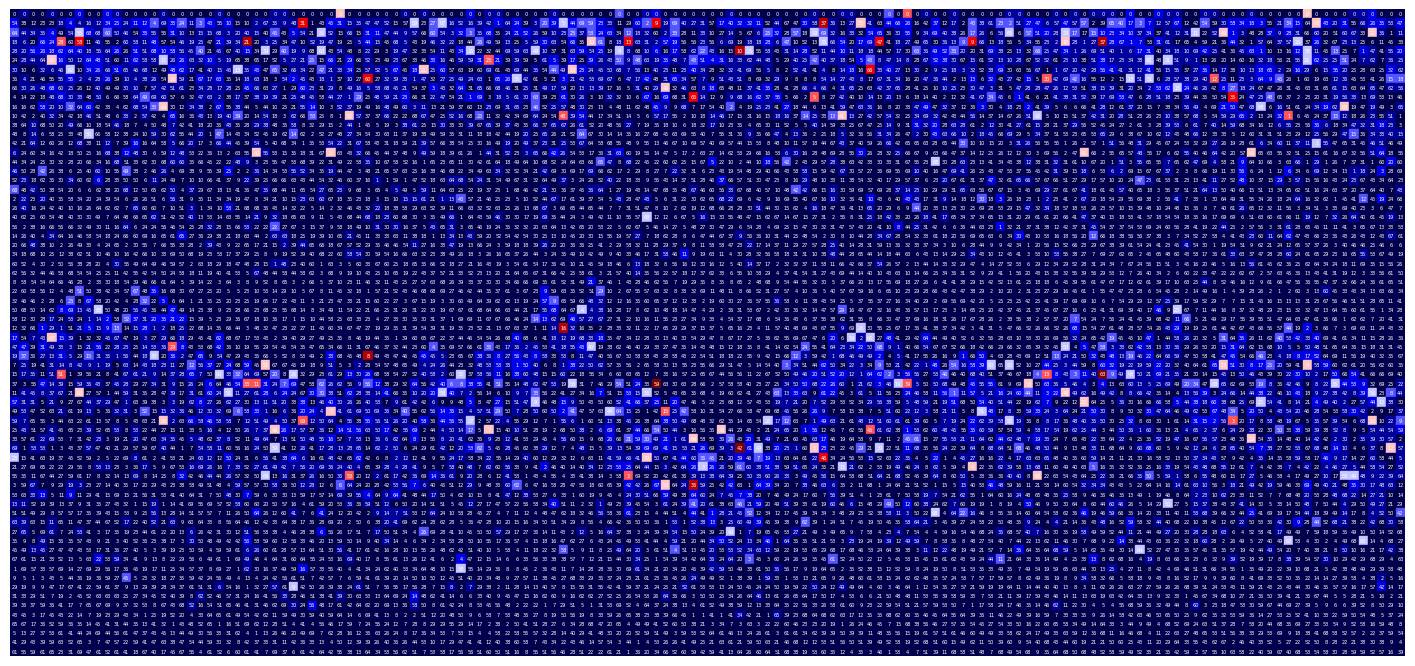

In [7]:
graphs_2, gt, cl = generate_dynamic_graphs(num_nodes=70, num_steps=150, num_groups=2, change_rate=0.05)
nrugs.draw_networkrug(graphs_2, color_encoding="betweenness_centrality", labels=True, pixel_size=12)

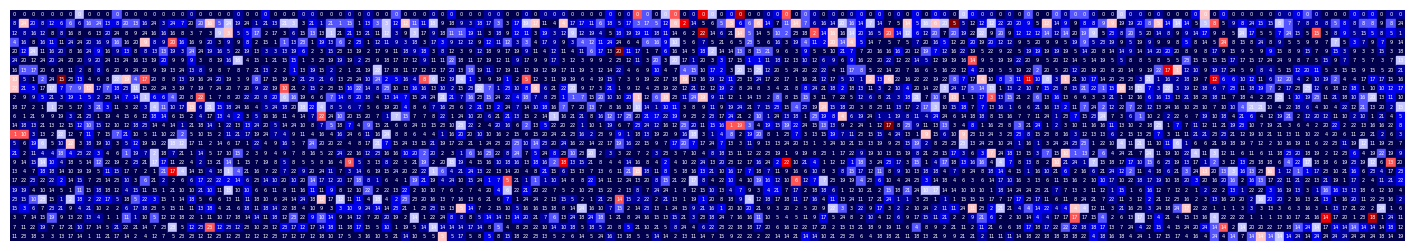

In [5]:
graphs_2, gt, cl = generate_dynamic_graphs(num_nodes=25, num_steps=150, num_groups=4, change_rate=0.05)
nrugs.draw_networkrug(graphs_2, color_encoding="betweenness_centrality", labels=True, pixel_size=12)

#### One group splitting into two groups

<module 'matplotlib.pyplot' from 'c:\\Users\\fried\\Desktop\\Uni\\Bachelorarbeit\\thesis\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

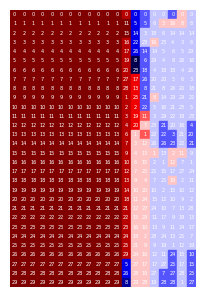

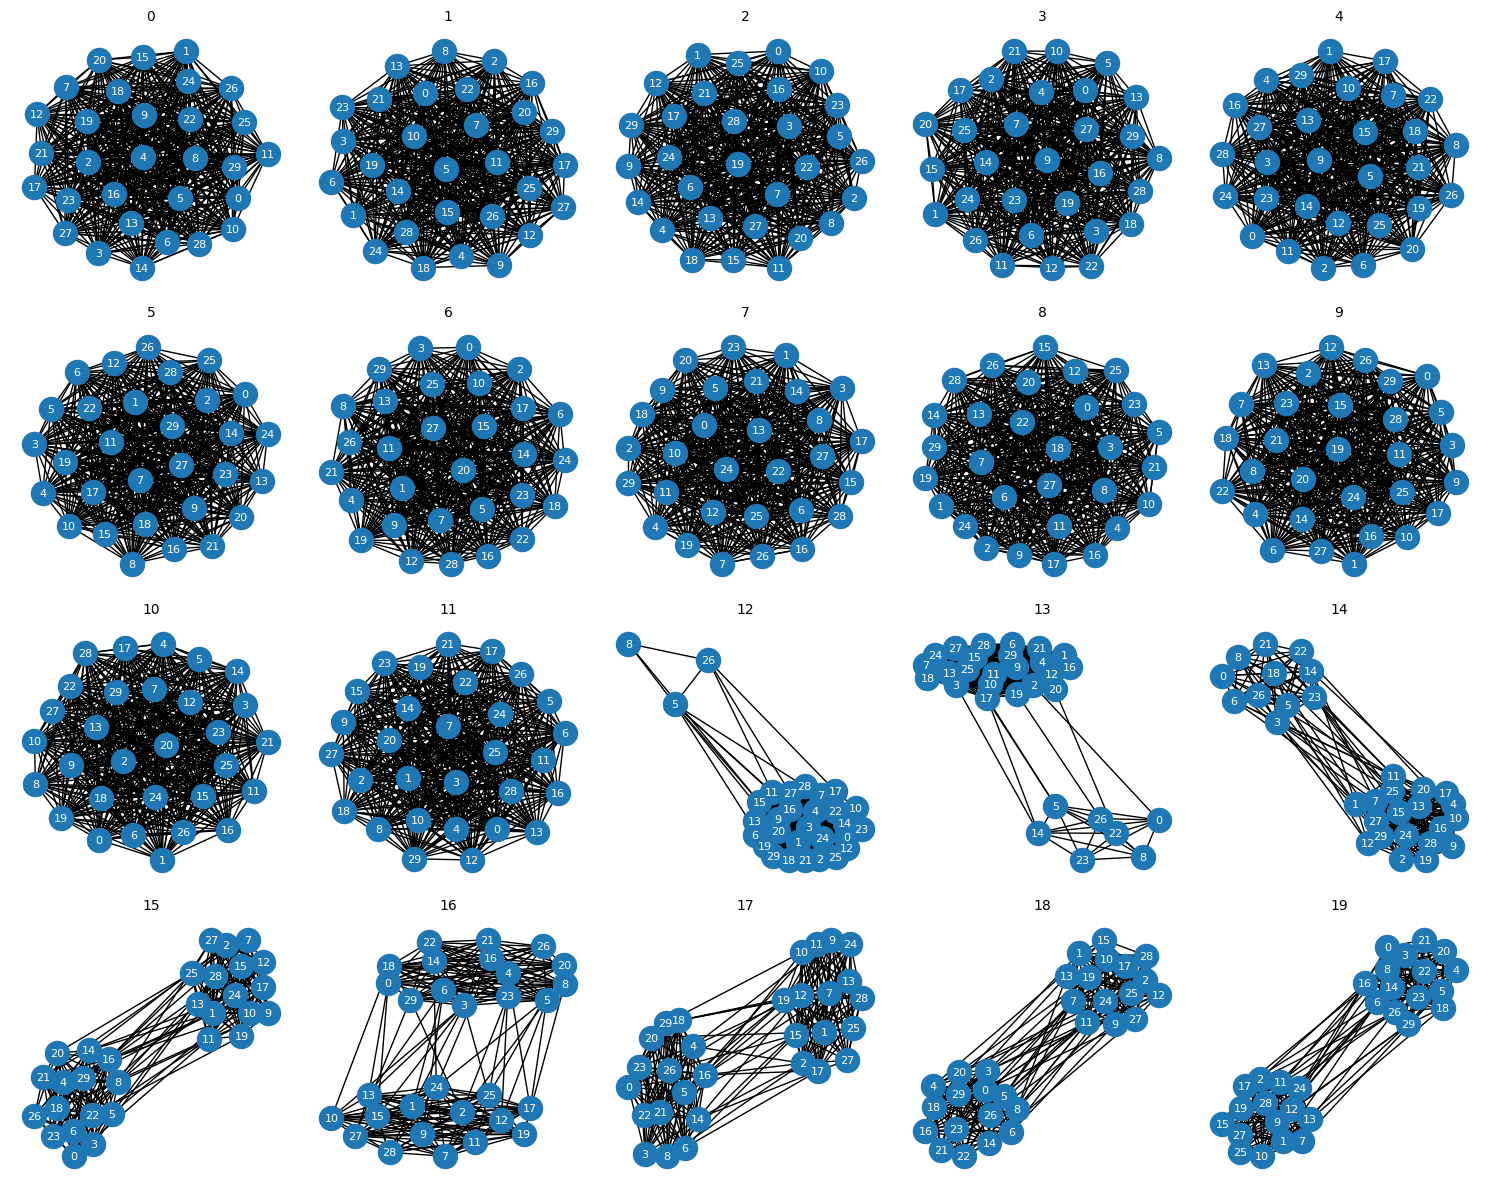

In [12]:
graphsXX, gt, cl = dg.generate_split_data(
    num_nodes=30,
    num_steps=20,
    num_groups=1,
    change_rate=0.00,
    intra_community_strength=1,
    inter_community_strength=0.1,
    split_events= {10: [(0, 5)] },
    seed=123
)

nrugs.draw_networkrug(graphsXX, color_encoding="closeness_centrality", labels=True, pixel_size=12)

visualization.visualize_graphs(graphsXX)


#### Two groups, one stays the same, one splits into two groups so in the end we have three groups

<module 'matplotlib.pyplot' from 'c:\\Users\\fried\\Desktop\\Uni\\Bachelorarbeit\\thesis\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

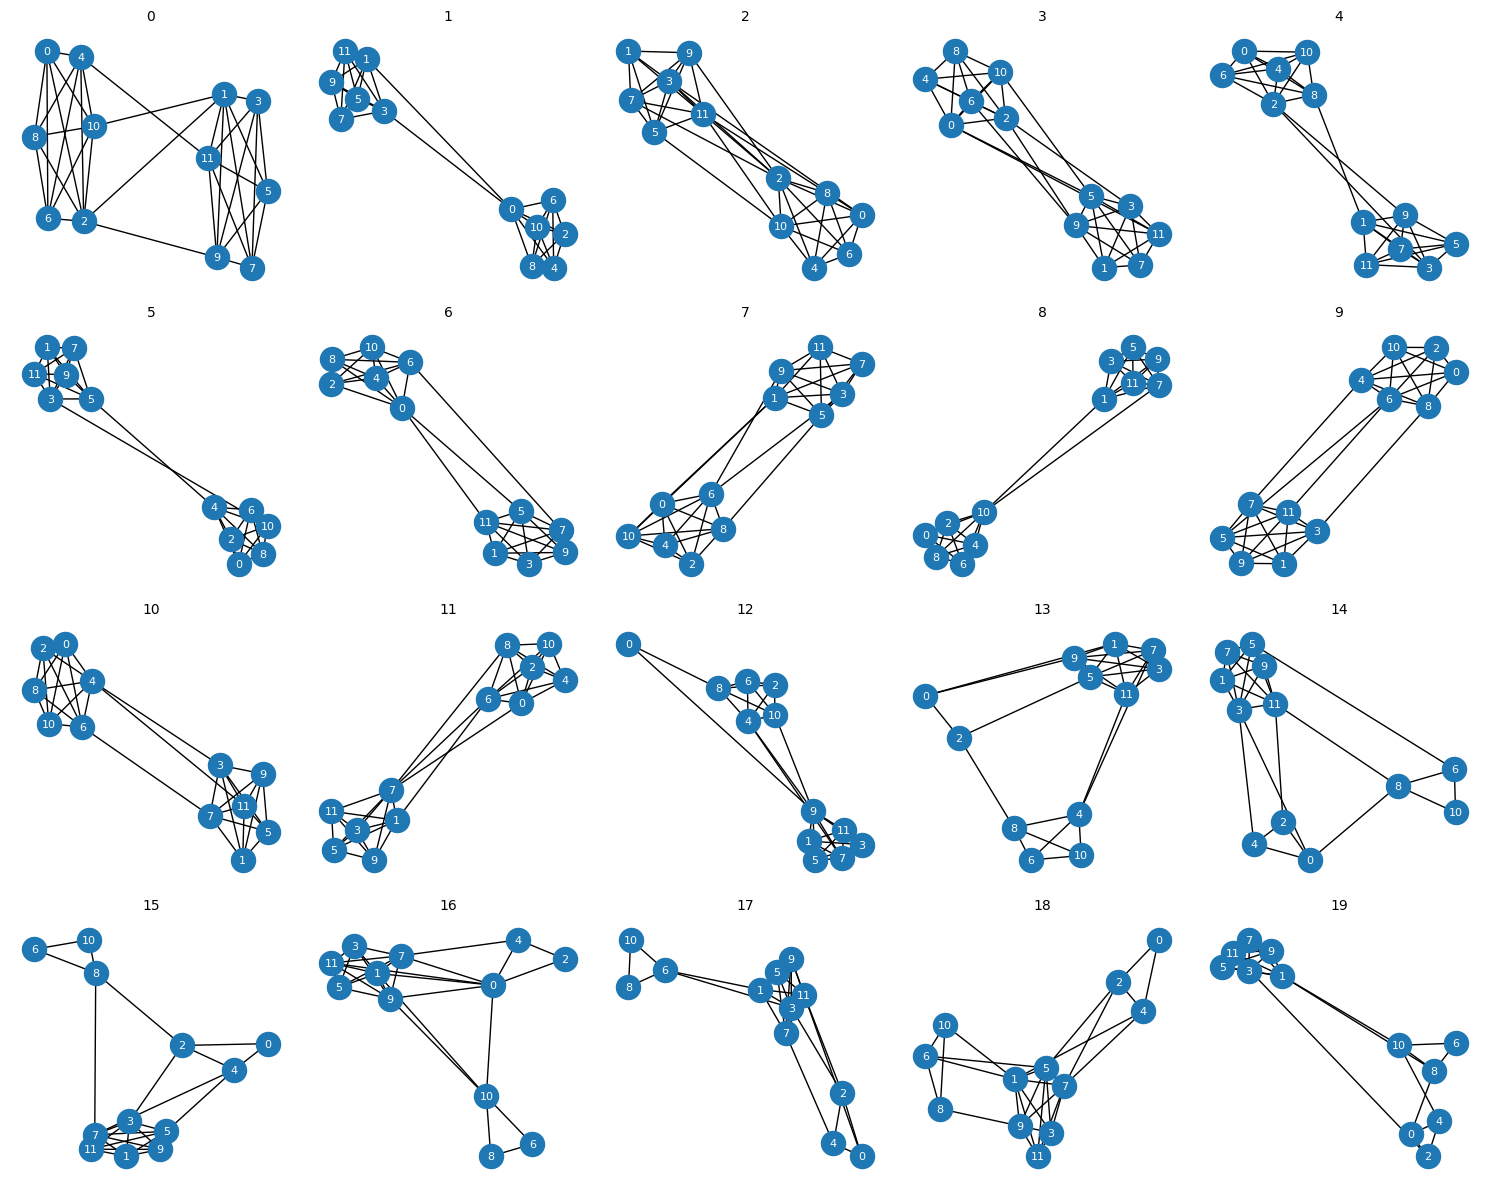

In [11]:
graphs, gt, changes = dg.generate_split_data(
    num_nodes=12,
    num_steps= 20,
    num_groups=2,
    change_rate=0,
    intra_community_strength=1,
    inter_community_strength=0.1,
    split_events= {10: [(0, 5)] },
    seed=42
)
visualization.visualize_graphs(graphs)

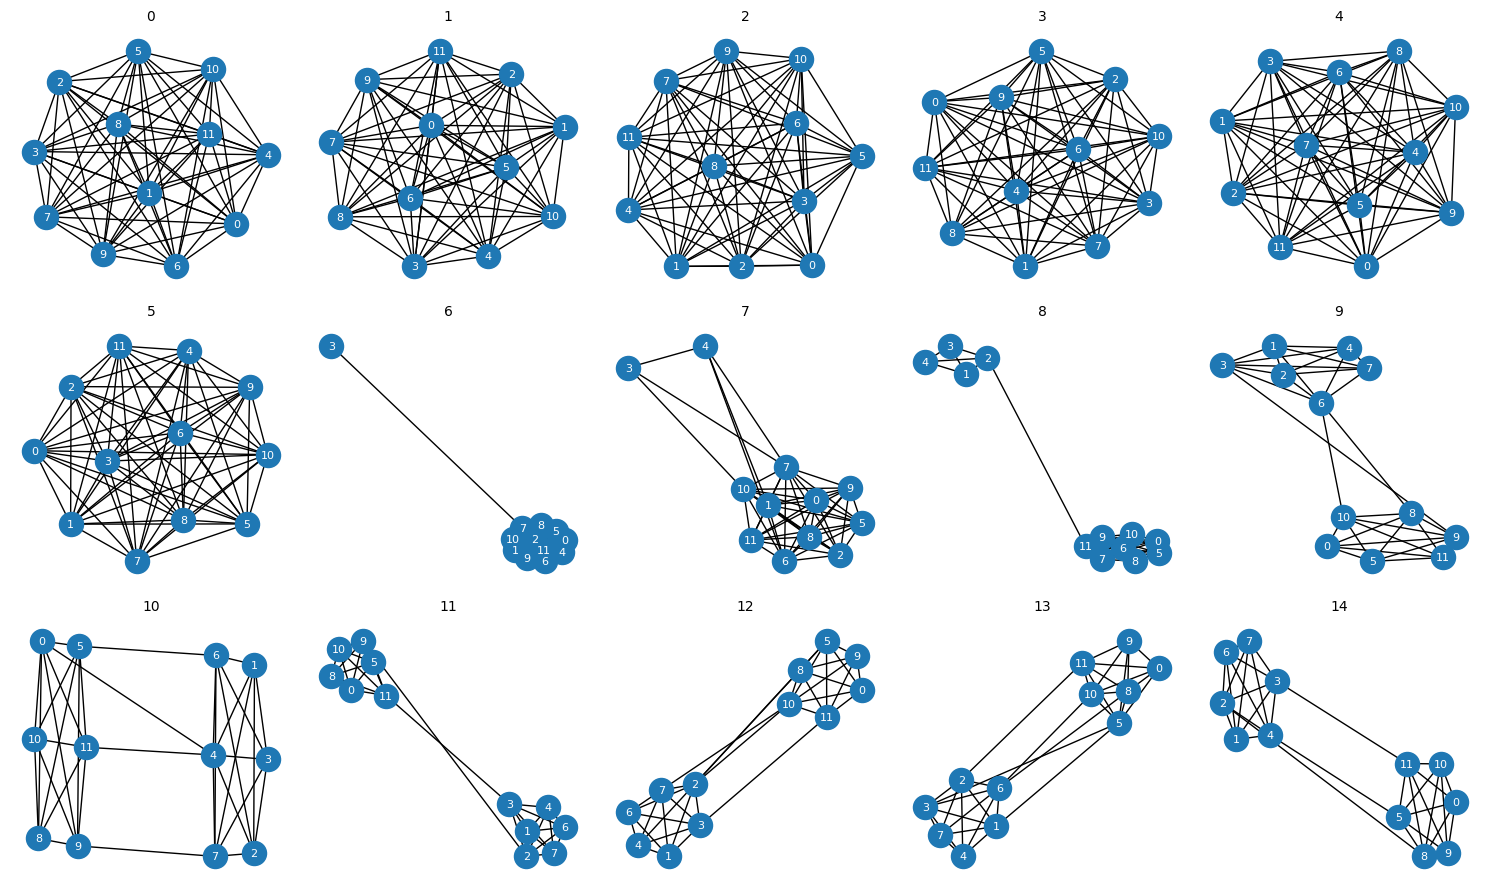

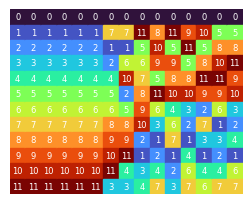

In [18]:
graphs, gt, changes = dg.generate_split_data(
    num_nodes=12,
    num_steps= 15,
    num_groups=1,
    change_rate=0,
    intra_community_strength=1,
    inter_community_strength=0.1,
    split_events={4: [(0, 5)]},
    seed=42
)

visualization.visualize_graphs(graphs)

nrugs.draw_networkrug(graphs, color_encoding="id3", labels=True, pixel_size=20)

In [4]:
graphs, gt, changes = dg.generate_split_data(
    num_nodes=50,
    num_steps= 300,
    num_groups=1,
    change_rate=0,
    intra_community_strength=0.9,
    inter_community_strength=0.1,
    split_events={125: [(0, 100)]},
    seed=42
)

#visualization.visualize_graphs(graphs)

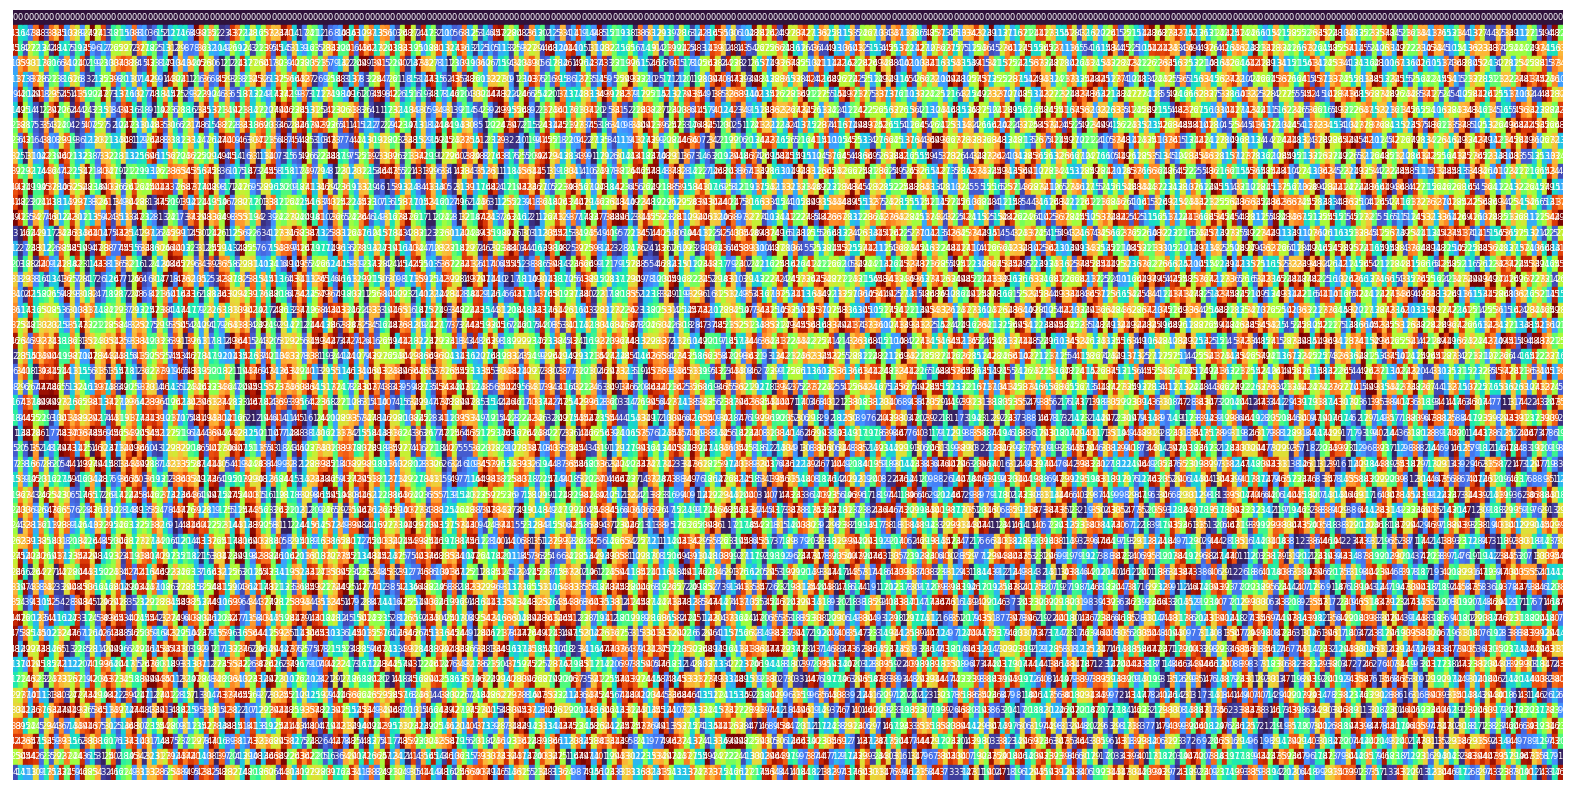

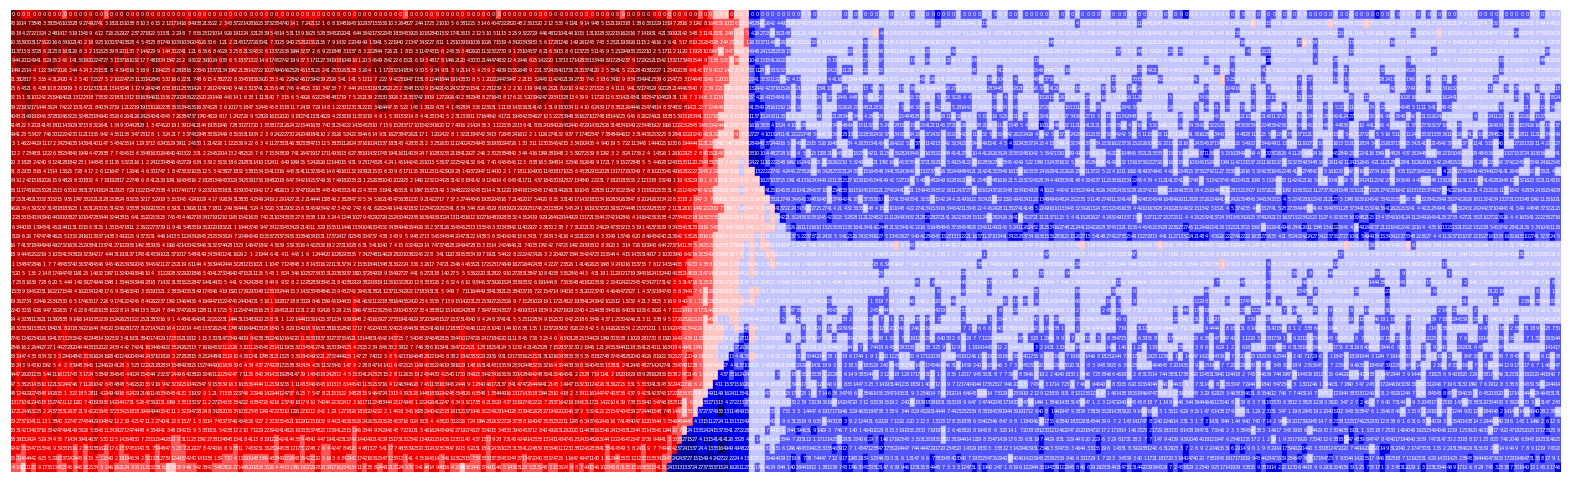

In [5]:
nrugs.draw_networkrug(graphs, color_encoding="id3", labels=True, pixel_size=20)
nrugs.draw_networkrug(graphs, color_encoding="closeness_centrality", labels=True, pixel_size=12)

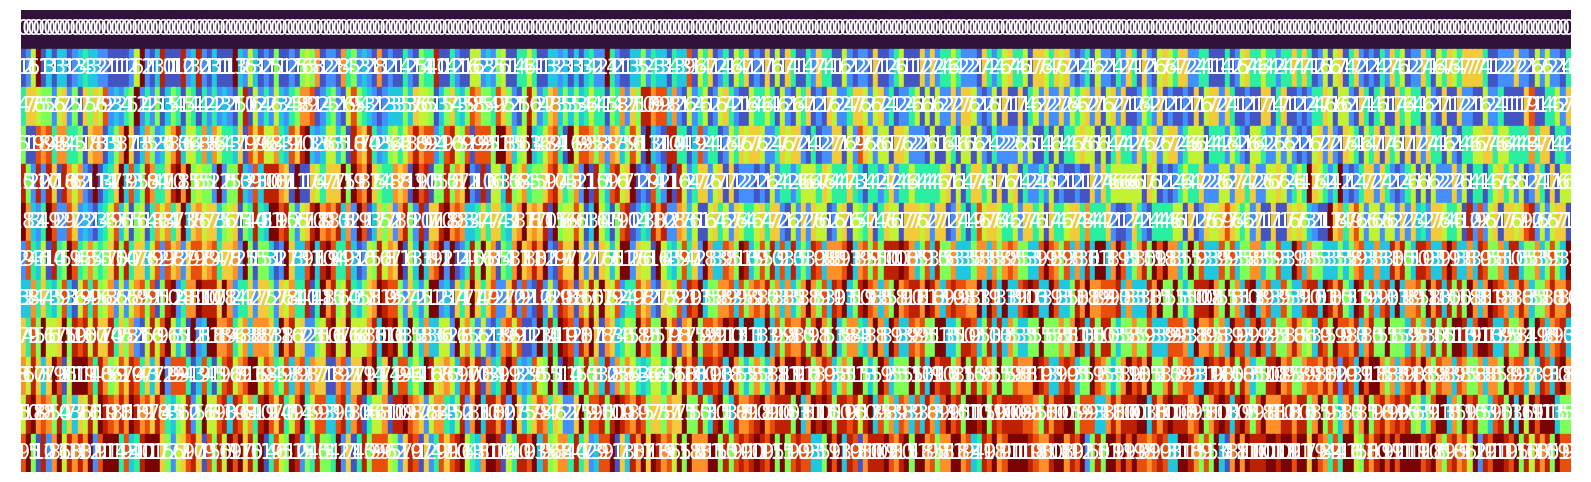

In [2]:
graphs, gt, changes = dg.generate_split_data(
    num_nodes= 12,
    num_steps= 300,
    num_groups=1,
    change_rate=0,
    intra_community_strength=0.9,
    inter_community_strength=0.1,
    split_events={125: [(0, 100)]},
    seed=42
)
nrugs.draw_networkrug(graphs, color_encoding="id3", labels=True, pixel_size=50)

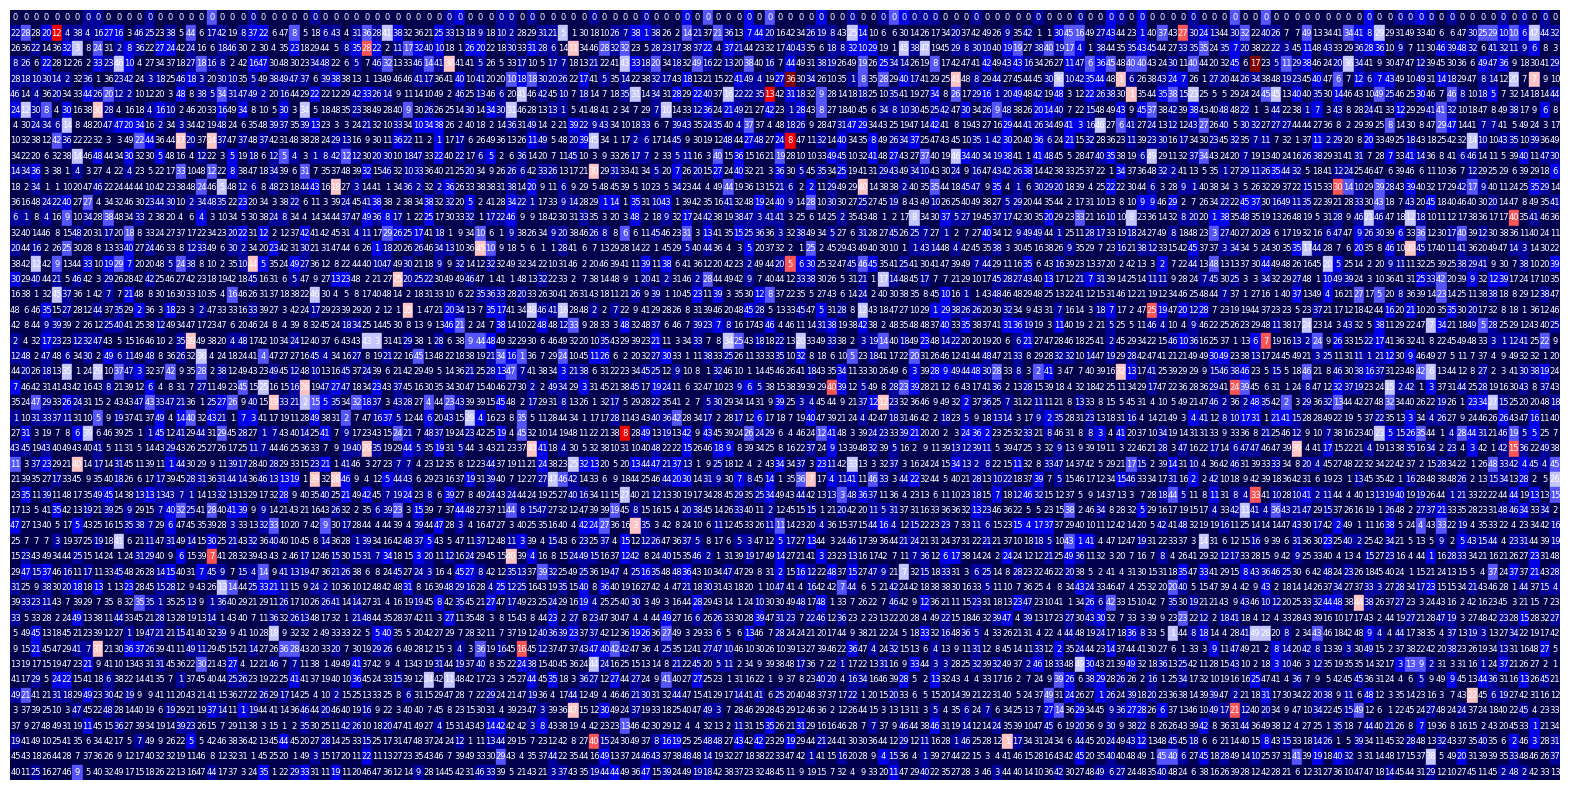

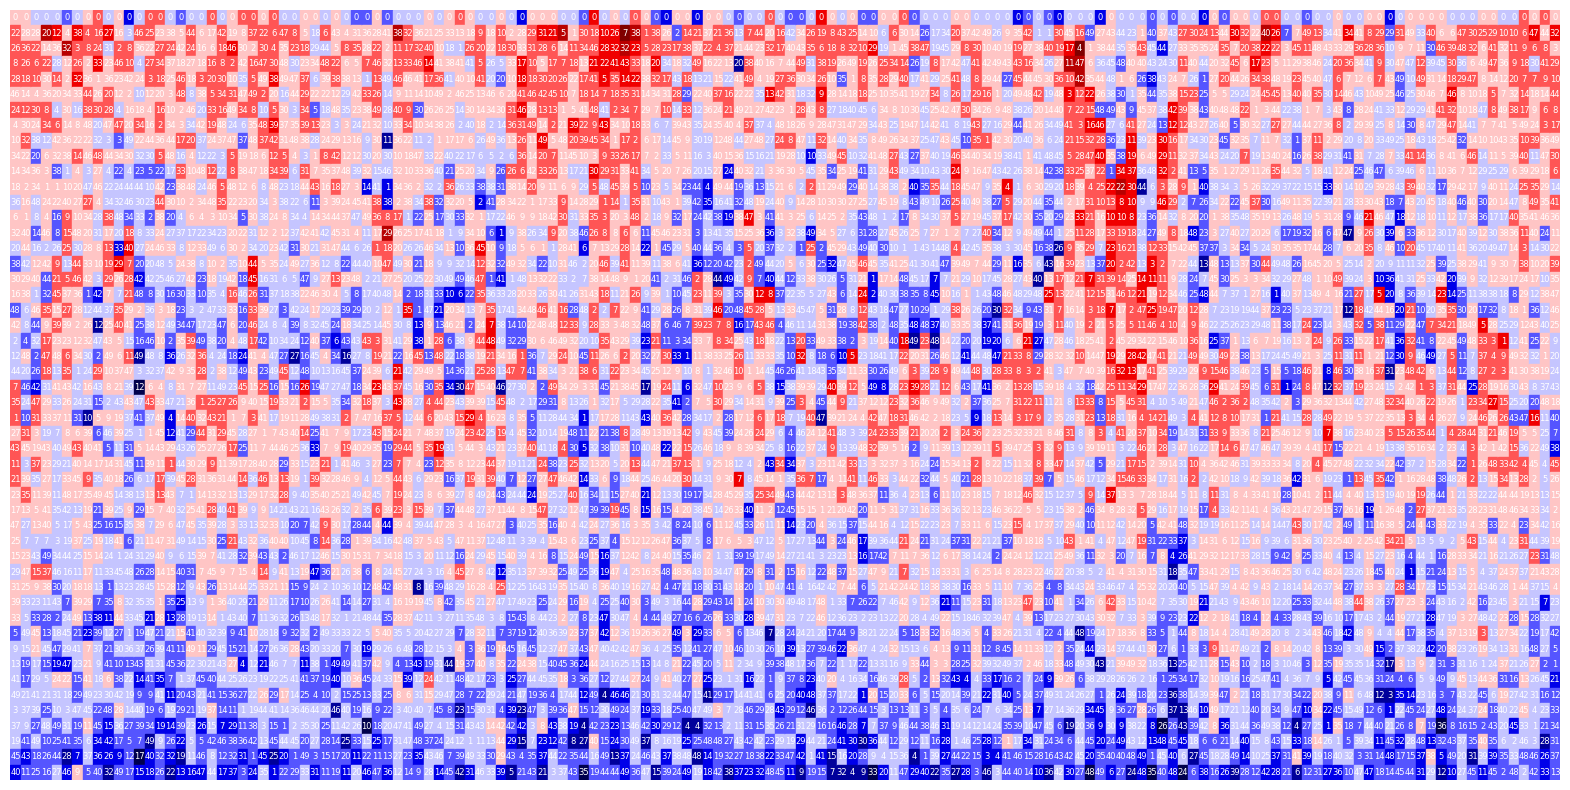

In [22]:
large_graphs, gt2_4, changes2_4 = generate_dynamic_graphs(
    num_nodes=50,
    num_steps=150,
    num_groups=2,
    change_rate=0.05,
    intra_community_strength=0.5,
    inter_community_strength=0.1,
    split_events={},
    seed=123
)
nrugs.draw_networkrug(large_graphs, color_encoding="betweenness_centrality", labels=True, pixel_size=20)
nrugs.draw_networkrug(large_graphs, color_encoding="closeness_centrality", labels=True, pixel_size=20)

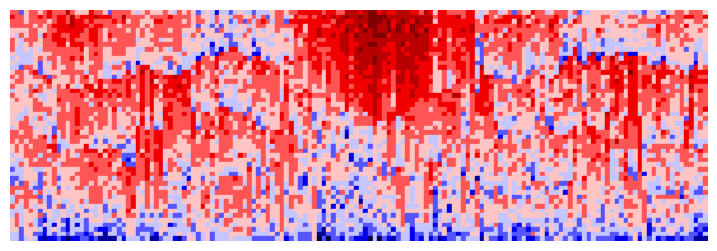

In [ ]:
# Interactive Pywidgets in Jupyter Notebook

import ba_utils.network_rugs as nrugs

test_graph, gt, cl = generate_dynamic_graphs(num_nodes=50, num_steps=150, num_groups=4, change_rate=0.05, split_events={})
#nr.draw_networkrug(test_graph, color_encoding='closeness_centrality', labels=False, pixel_size=6)

nrugs.interactive_rug(test_graph)  # in Jupyter

In [9]:
test_graph, gt, cl = generate_dynamic_graphs(num_nodes=50, num_steps=150, num_groups=2, change_rate=0.05, split_events={})
nrugs.launch_tkinter_ui(test_graph)

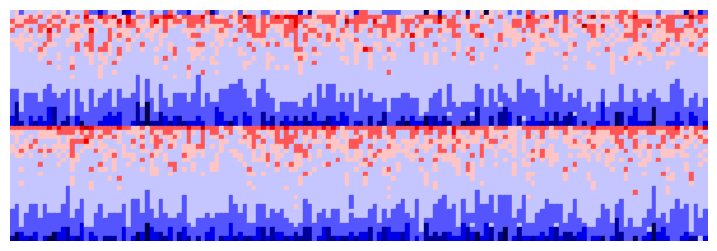

In [ ]:
test_graph, gt, cl = generate_dynamic_graphs(num_nodes=50, num_steps=150, num_groups=2, change_rate=0.00)

#nr.draw_networkrug(test_graph, color_encoding='closeness_centrality', labels=False, pixel_size=6)

# Interactive Pywidgets in Jupyter Notebook
nrugs.interactive_rug(test_graph)  # in Jupyter

In [30]:
nrugs.launch_tkinter_ui(test_graph)